In [1]:
import sys, os
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import splitlib as sp

filename = "/scratch/mmarcheg/lumi_data/Run300806.root"
plot_dir = "../ntuplesPixel/plots/fake_inefficiency/"
if not os.path.exists(plot_dir):
	os.makedirs(plot_dir)
print("Plots will be saved in " + plot_dir)
print("Opening %s" % filename)
file = uproot.open(filename)
tree = file[b'a/tree;1']
print(str(tree.name) + " contains " + str(len(tree)) + " entries")

Plots will be saved in ../ntuplesPixel/plots/fake_inefficiency/
Opening /scratch/mmarcheg/lumi_data/Run300806.root
b'tree' contains 53605236 entries


In [2]:
df = tree.pandas.df([b'ladder', b'x', b'y', b'pos_x', b'pos_y', b'size', b'cols', b'rows', b'global_eta', b'global_phi', b'instaLumi', b'bx', b'tres'])

In [4]:
nfull = 7
nbroken = 5
df_grid, df_grid_full, df_grid_broken = sp.select_cols_df(df, nfull, nbroken, selection=False)
df_grid_full = sp.select_rows(df_grid_full, 1)
df_grid_broken = sp.select_rows(df_grid_broken, 1)

Selecting cols==7
Selecting size==5
entries = 192306933
Selecting rows==1	entries = 1283104	Selecting rows==1	entries = 219210	

In [54]:
j = 0
M = np.matrix([[0]*8]*8)
#print(M)
missing = []
N_tot = 0
for i in range(len(df_grid_broken)):
    pixel_hits = []
    missing = []
    for j in range(nbroken):
        if j == 0:
            if df_grid_broken.iloc[nbroken*i+j]['x'] == 0:
                j = -1
                break
        pixel_hits.append(df_grid_broken.iloc[nbroken*i+j]['x'])
    if j == -1:
        continue
    for j in range(1, nfull):
        if j not in pixel_hits:
            missing.append(j)
    #print(pixel_hits)
    #print(missing, end="\t")
    #print(5*i+j)
    if len(missing) > 2:
        break
    else:
        M.itemset(tuple(missing), M.item(tuple(missing)) + 1)
        N_tot += 1
    
print("Matrix of missing pixels")
print(M,end="\n\n")
print("Percentages of missing pixels")
print(100*M/N_tot)

Matrix of missing pixels
[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0 7008  105   71   49    0]
 [   0    0    0    0  260   64   57    0]
 [   0    0    0    0    0 6955   87    0]
 [   0    0    0    0    0    0  338    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]

Percentages of missing pixels
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         46.73869548  0.70028011  0.47352274
   0.32679739  0.        ]
 [ 0.          0.          0.          0.          1.73402694  0.4268374
   0.38015206  0.        ]
 [ 0.          0.          0.          0.          0.         46.38522075
   0.58023209  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   2.25423503  0.        ]
 [ 0.          0. 

In [87]:
M_new = np.delete(M, [0,1,7], 0)
M_new = np.delete(M_new, [0,1,7], 1)
print(M_new)
np.set_printoptions(precision=1)
print(100*M_new/N_tot)

[[   0 7008  105   71   49]
 [   0    0  260   64   57]
 [   0    0    0 6955   87]
 [   0    0    0    0  338]
 [   0    0    0    0    0]]
[[ 0.  46.7  0.7  0.5  0.3]
 [ 0.   0.   1.7  0.4  0.4]
 [ 0.   0.   0.  46.4  0.6]
 [ 0.   0.   0.   0.   2.3]
 [ 0.   0.   0.   0.   0. ]]


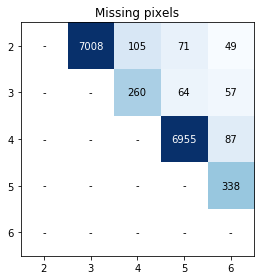

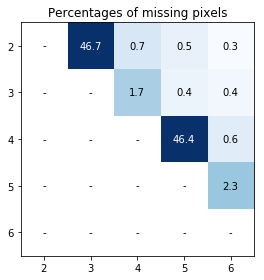

In [118]:
from matplotlib import colors
for (k,matrix) in enumerate([M_new, 100*M_new/N_tot]):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, norm=colors.LogNorm(vmin=matrix[matrix != 0].min(), vmax=matrix.max()), cmap="Blues")
    ax_ticks = range(2,7)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(ax_ticks)))
    ax.set_yticks(np.arange(len(ax_ticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(ax_ticks)
    ax.set_yticklabels(ax_ticks)

    # Loop over data dimensions and create text annotations.
    for i in range(len(ax_ticks)):
        for j in range(len(ax_ticks)):
            if M_new[i, j] != 0:
                if k == 0:
                    str = "%d"
                else:
                    str = "%.1f"
                if matrix[i, j] < 0.9*matrix.max():
                    text = ax.text(j, i, str % matrix[i, j], ha="center", va="center", color="black")
                else:
                    text = ax.text(j, i, str % matrix[i, j], ha="center", va="center", color="white")                    
            else:
                text = ax.text(j, i, "-", ha="center", va="center", color="black")

    filename = ""
    if k == 0:
        ax.set_title("Missing pixels")
        filename = "missing_pixels.png"
    if k == 1:
        ax.set_title("Percentages of missing pixels")
        filename = "missing_pixels_perc.png"
    fig.tight_layout()
    plt.savefig(plot_dir + filename, format="png", dpi=300)
    plt.show()

In [94]:
for i in range(nbroken):
    print(df_grid_broken.iloc[148201+i])

ladder           -3.000000
x                 1.000000
y                 0.000000
pos_x            44.000000
pos_y            19.000000
size              5.000000
cols              7.000000
rows              1.000000
global_eta       -2.784729
global_phi        2.683816
instaLumi     16893.700000
bx             1334.000000
tres           1898.000000
Name: (36117627, 1), dtype: float64
ladder           -3.000000
x                 4.000000
y                 0.000000
pos_x            44.000000
pos_y            19.000000
size              5.000000
cols              7.000000
rows              1.000000
global_eta       -2.784729
global_phi        2.683816
instaLumi     16893.700000
bx             1334.000000
tres           1898.000000
Name: (36117627, 2), dtype: float64
ladder           -3.000000
x                 5.000000
y                 0.000000
pos_x            44.000000
pos_y            19.000000
size              5.000000
cols              7.000000
rows              1.000000
global_eta